<a href="https://colab.research.google.com/github/SasikumarTummuri/project/blob/main/FMML_Module4_Lab3_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

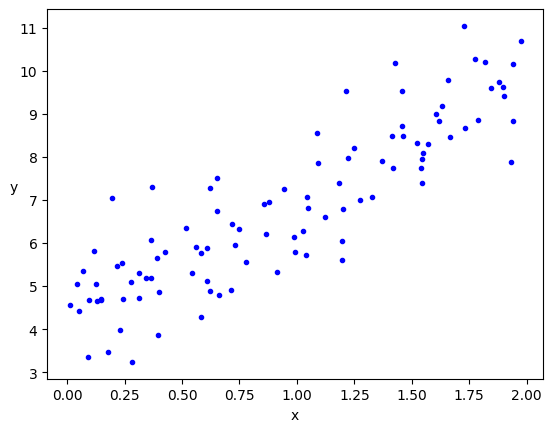

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [5]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [6]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [7]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

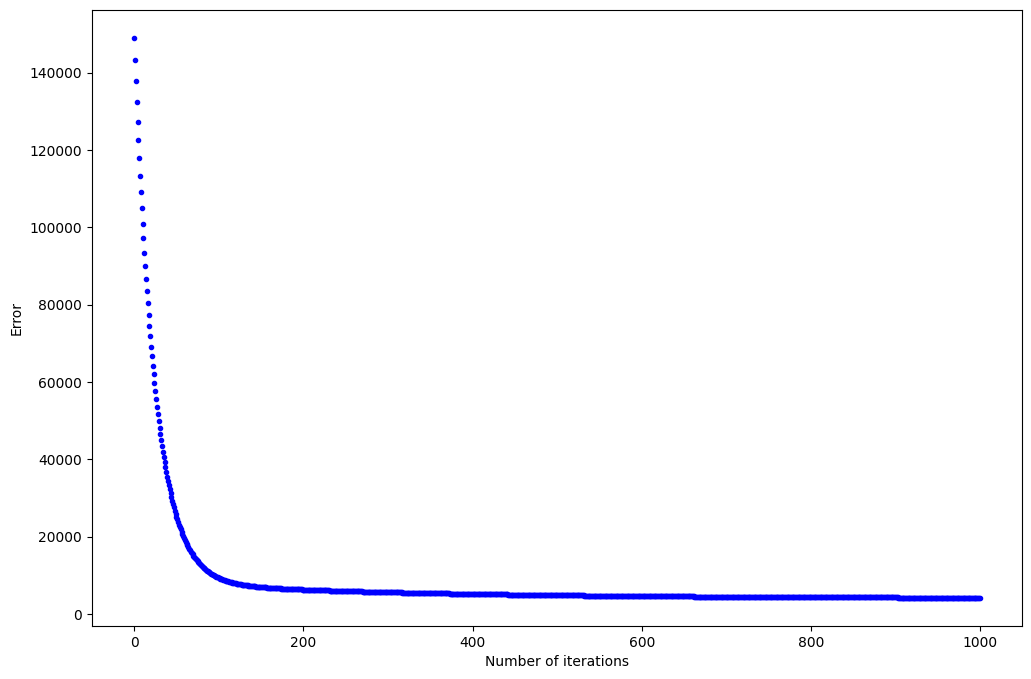

In [8]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

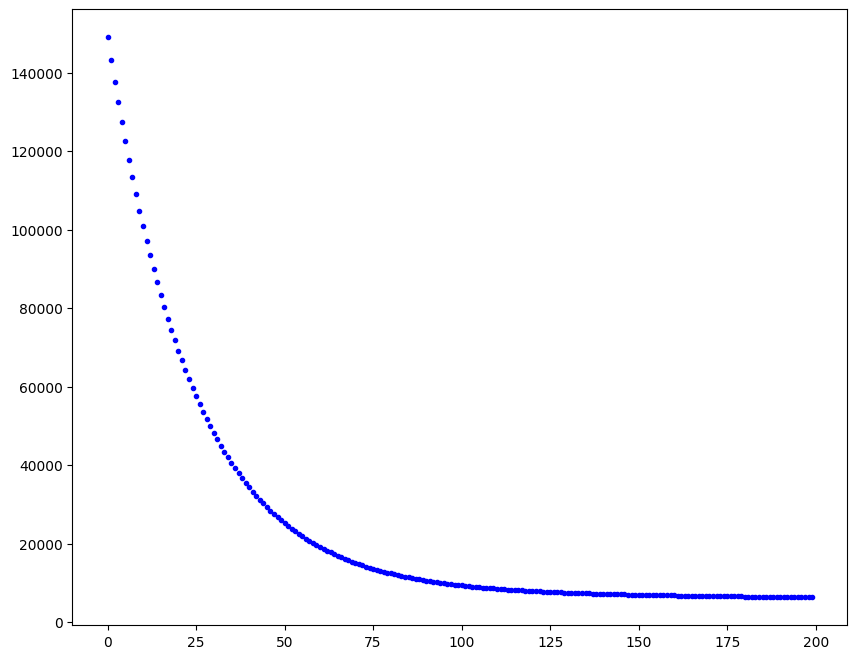

In [9]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [10]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [11]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


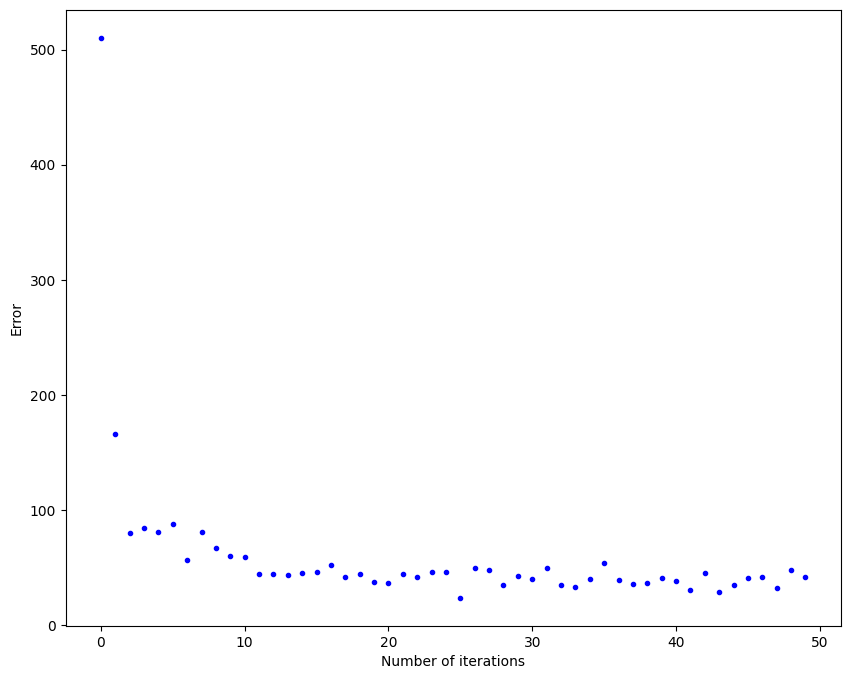

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [13]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [14]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


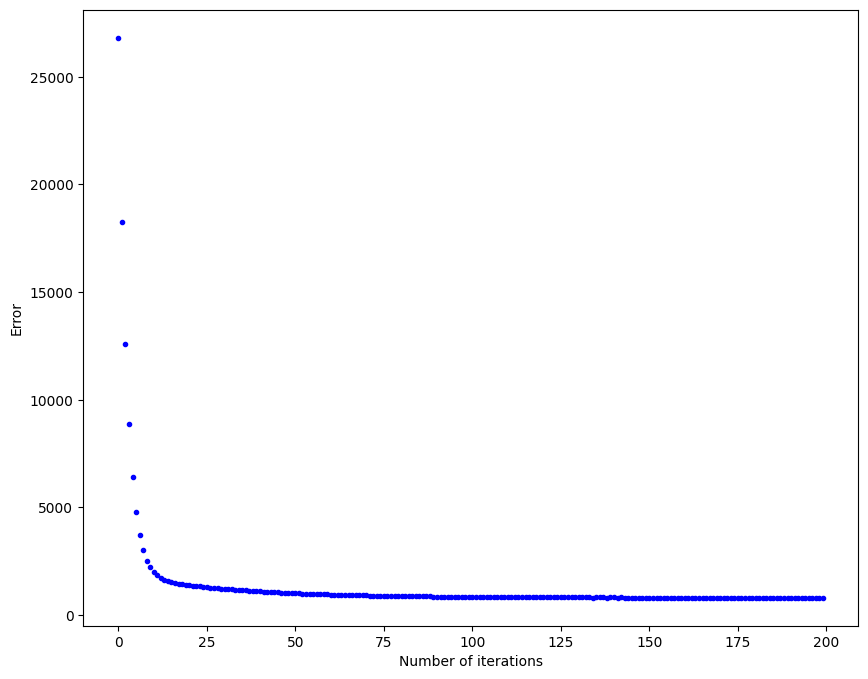

In [15]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

# **ANSWER-1.**

In [16]:
import numpy as np

# Sample dataset (dummy data for demonstration)
# Replace this with your actual dataset
# Assume X is the input features and y is the target variable
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.rand(1000, 1)   # Corresponding target values

# Function to perform mini-batch gradient descent
def mini_batch_gradient_descent(X, y, learning_rate, epochs, batch_size):
    num_samples = X.shape[0]
    num_features = X.shape[1]
    weights = np.random.rand(num_features, 1)  # Initialize weights randomly

    for epoch in range(epochs):
        # Shuffle the dataset (to randomize batches in each epoch)
        indices = np.random.permutation(num_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, num_samples, batch_size):
            # Create mini-batch
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Calculate predictions and gradient
            predictions = np.dot(X_batch, weights)
            error = predictions - y_batch
            gradient = np.dot(X_batch.T, error) / batch_size

            # Update weights using gradient descent
            weights -= learning_rate * gradient

        # Optionally, print or log the loss/error at each epoch
        # loss = calculate_loss(X, y, weights)
        # print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

    return weights

# Parameters for mini-batch gradient descent
learning_rate = 0.01
epochs = 50
batch_size = 32  # Change this value to experiment with different batch sizes

# Run mini-batch gradient descent
trained_weights = mini_batch_gradient_descent(X, y, learning_rate, epochs, batch_size)


# **ANSWER-2.**

In [17]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term to X
X = np.c_[np.ones((X.shape[0], 1)), X]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression model (for demonstration purposes)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_predict(X, weights):
    return sigmoid(np.dot(X, weights))

def logistic_regression_train(X, y, learning_rate, epochs, batch_size):
    num_samples, num_features = X.shape
    weights = np.random.rand(num_features)

    for epoch in range(epochs):
        # Shuffle the dataset (to randomize batches in each epoch)
        indices = np.random.permutation(num_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, num_samples, batch_size):
            # Create mini-batch
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Calculate predictions and gradient
            predictions = logistic_regression_predict(X_batch, weights)
            error = predictions - y_batch
            gradient = np.dot(X_batch.T, error) / batch_size

            # Update weights using gradient descent
            weights -= learning_rate * gradient

    return weights

# Train models using different gradient descent variations
learning_rate = 0.01
epochs = 1000
batch_size_full = len(X_train)
batch_size_mini = 32
batch_size_stochastic = 1

weights_full = logistic_regression_train(X_train, y_train, learning_rate, epochs, batch_size_full)
weights_mini = logistic_regression_train(X_train, y_train, learning_rate, epochs, batch_size_mini)
weights_stochastic = logistic_regression_train(X_train, y_train, learning_rate, epochs, batch_size_stochastic)

# Evaluate the models on the test set (for demonstration purposes)
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Make predictions using trained models
pred_full = (logistic_regression_predict(X_test, weights_full) > 0.5).astype(int)
pred_mini = (logistic_regression_predict(X_test, weights_mini) > 0.5).astype(int)
pred_stochastic = (logistic_regression_predict(X_test, weights_stochastic) > 0.5).astype(int)

# Calculate accuracy of the models
accuracy_full = accuracy_score(y_test, pred_full)
accuracy_mini = accuracy_score(y_test, pred_mini)
accuracy_stochastic = accuracy_score(y_test, pred_stochastic)

print(f"Accuracy (Full Batch Gradient Descent): {accuracy_full}")
print(f"Accuracy (Mini-Batch Gradient Descent): {accuracy_mini}")
print(f"Accuracy (Stochastic Gradient Descent): {accuracy_stochastic}")



<ipython-input-17-424c52832f89>:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy (Full Batch Gradient Descent): 0.6333333333333333
Accuracy (Mini-Batch Gradient Descent): 0.6333333333333333
Accuracy (Stochastic Gradient Descent): 0.6333333333333333


# **ANSWER-3.**

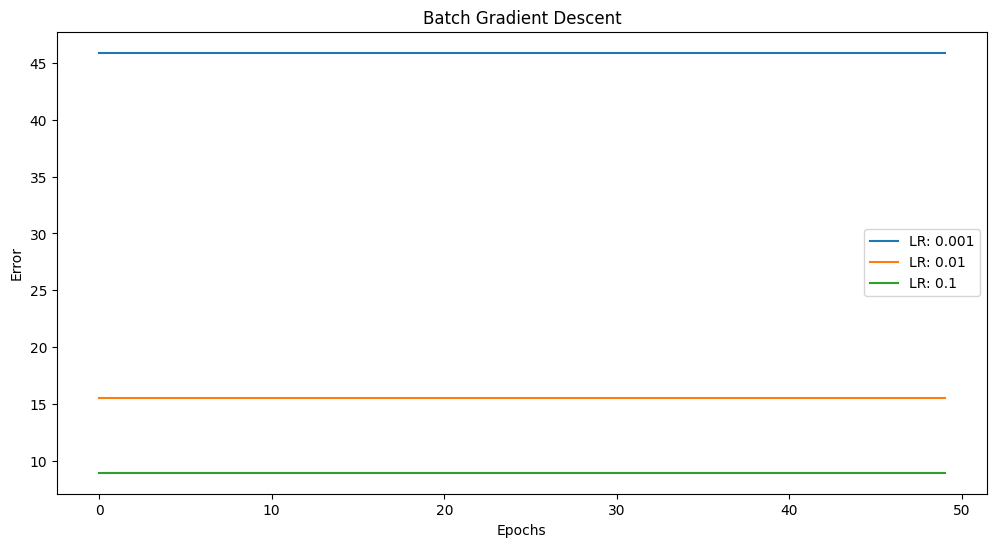

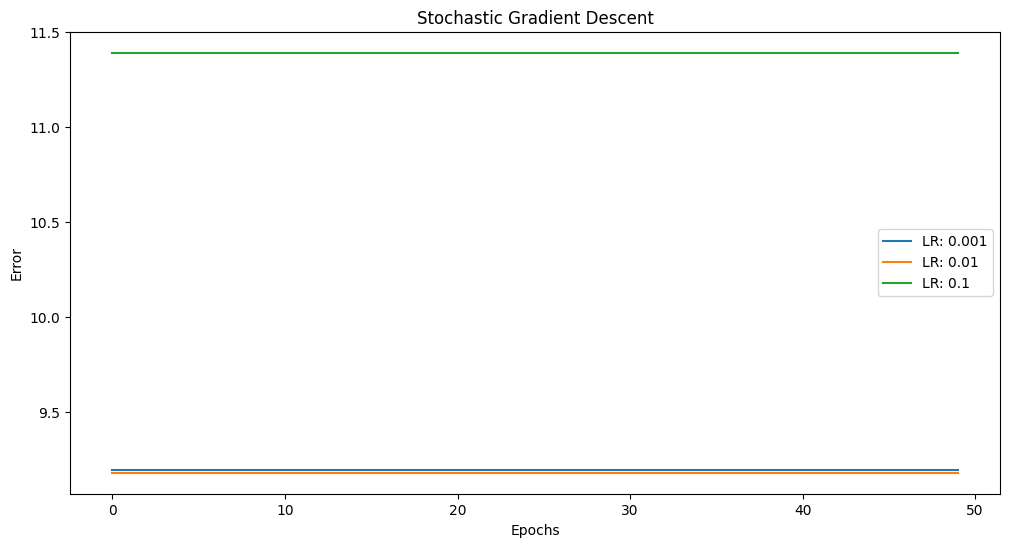

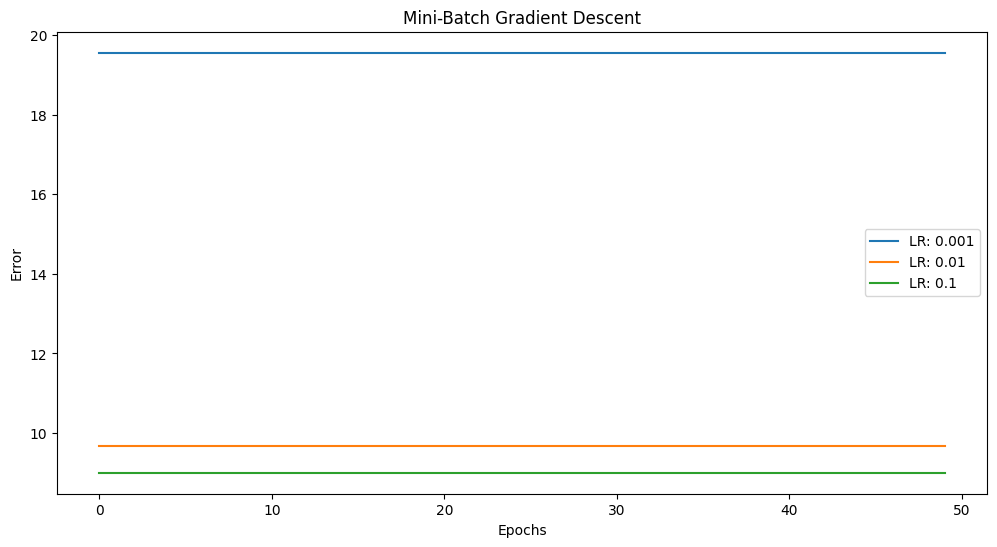

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Function for Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate, epochs):
    m = len(X)
    theta = np.random.randn(2, 1)

    for epoch in range(epochs):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients

    return theta

# Function for Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate, epochs):
    m = len(X)
    theta = np.random.randn(2, 1)

    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients

    return theta

# Function for Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, learning_rate, epochs, batch_size):
    m = len(X)
    theta = np.random.randn(2, 1)
    num_batches = m // batch_size

    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi) / batch_size
            theta -= learning_rate * gradients

    return theta

# Define function to plot learning curves
def plot_learning_curves(model, X, y, learning_rate, epochs, title):
    learning_rates = [learning_rate / 10, learning_rate, learning_rate * 10]
    plt.figure(figsize=(12, 6))

    for lr in learning_rates:
        if model == 'Batch GD':
            theta = batch_gradient_descent(X, y, lr, epochs)
        elif model == 'SGD':
            theta = stochastic_gradient_descent(X, y, lr, epochs)
        elif model == 'Mini-Batch GD':
            theta = mini_batch_gradient_descent(X, y, lr, epochs, batch_size=20)

        plt.plot(range(epochs), [np.linalg.norm(X_b.dot(theta) - y) for epoch in range(epochs)], label=f'LR: {lr}')

    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(title)
    plt.legend()
    plt.show()

# Set common parameters
epochs = 50
learning_rate = 0.01

# Plot learning curves for different gradient descent methods
plot_learning_curves('Batch GD', X_b, y, learning_rate, epochs, 'Batch Gradient Descent')
plot_learning_curves('SGD', X_b, y, learning_rate, epochs, 'Stochastic Gradient Descent')
plot_learning_curves('Mini-Batch GD', X_b, y, learning_rate, epochs, 'Mini-Batch Gradient Descent')
